In [1]:
# pour afficher les graphique a la continuete du code
%matplotlib inline

from random import randint,seed

from enum import Enum

import matplotlib.pyplot as plt

In [2]:
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2
    ALEA = 3

In [3]:
seed()

def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''
    
    portes = [0,1,2]
    bonne_reponse = randint(0,2)
    
    #premier choix du jouer
    pr_choix= randint(0,2)
    
    #le presentateur elimine une porte
    portes.remove(pr_choix)
    if pr_choix == bonne_reponse:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_reponse]
    
    deuxieme_choix = 0
    
    if strategie == Strategie.CHANGER :
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER :
        deuxieme_choix = pr_choix
    elif strategie == Strategie.ALEA :
        portes.append(pr_choix)
        deuxieme_choix = portes[randint(0,1)]
    else:
        raise ValueError("Stategie non reconue")
    
    return deuxieme_choix == bonne_reponse

In [4]:
def play(strategie, nb_tours):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de plusieurs parties
    du jeu Monty Hall sous forme d'une liste de gains par le 
    joueur.
    
    Args:
        strategie (Strategie): La strategie du joueur
        nb_tours (int): Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs à chaque partie
    '''
    return [ 1 if play_game(strategie) else 0 for i in range(nb_tours)]


In [5]:
gains_changer = []
gains_garder = []
gains_alea = []

samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for Nbtours in samples:
    gains_changer.append(play(Strategie.CHANGER, Nbtours))
    gains_garder.append(play(Strategie.GARDER, Nbtours))
    gains_alea.append(play(Strategie.ALEA, Nbtours))

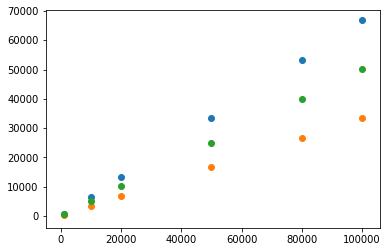

In [6]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])
plot = plt.scatter(samples, [sum(x) for x in gains_alea])

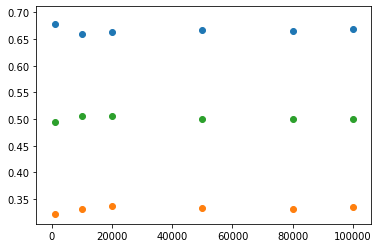

In [7]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x)/len(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x)/len(x) for x in gains_garder])
plot = plt.scatter(samples, [sum(x)/len(x) for x in gains_alea])

In [8]:
import numpy as np

x0 = np.zeros((10,10),dtype=float)
x0.shape

(10, 10)

# concatenation

In [9]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [10]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

# Puissance de numpy (les Loops)

## cree un tableau numpy

In [11]:
# Un tableau de longueur 10, rempli d'entiers qui valent 0
np.zeros(10, dtype=int)

# Un tableau de taille 3x5 rempli de nombres à virgule flottante de valeur 1
np.ones((3, 5), dtype=float)

# Un tableau 3x5 rempli de 3,14
np.full((3, 5), 3.14)

# Un tableau rempli d'une séquence linéaire
# commençant à 0 et qui se termine à 20, avec un pas de 2
np.arange(0, 20, 2)

# Un tableau de 5 valeurs, espacées uniformément entre 0 et 1
np.linspace(0, 1, 5)

# Celle-ci vous la conaissez déjà! Essayez aussi "randint" et "normal"
np.random.random((3, 3))

# La matrice identité de taille 3x3 
# (matrice identité : https://fr.wikipedia.org/wiki/Matrice_identit%C3%A9)
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## propriete de base

In [12]:
np.random.seed(0)
x1 = np.random.randint(10, size=6)  # Tableau de dimension 1
print("nombre de dimensions de x1: ", x1.ndim)
print("forme de x1: ", x1.shape)
print("taille de x1: ", x1.size)
print("type de x1: ", x1.dtype)

nombre de dimensions de x1:  1
forme de x1:  (6,)
taille de x1:  6
type de x1:  int64


## Puissance sur les loop

In [13]:
def calcul_inverse(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
print(calcul_inverse(values))

tableau_large = np.random.randint(1, 100, size=1000000)

# Ceci est une facilité des notebooks jupyter pour 
# mesurer le temps d'exécution d'une instruction
%timeit calcul_inverse(tableau_large)

[0.25       0.16666667 0.33333333 0.2        0.125     ]
1.8 s ± 14.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
# plus. rapide que la fonction en haut mais rempli la meme fonction
%timeit (1.0 / tableau_large)

1.45 ms ± 29.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
# Il y a tout d'abord des opération mathématiques simples
x = np.arange(10)
print("x     =", x)
print("x + 5    =", x+5)
print("x // 5    =", x//5) # division par arronid


x     = [0 1 2 3 4 5 6 7 8 9]
x + 5    = [ 5  6  7  8  9 10 11 12 13 14]
x // 5    = [0 0 0 0 0 1 1 1 1 1]


# Operation Booleene

In [16]:
x = np.random.randint(1,10,(3,3))
x > 10

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [17]:
x

array([[8, 1, 4],
       [3, 8, 8],
       [7, 9, 1]])

In [18]:
y=np.where(x>10)

# agregation

In [19]:
%timeit sum(tableau_large)
%timeit np.sum(tableau_large)

79.4 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
502 µs ± 3.68 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
x.sum(axis=1) # to sum the line  0 to sum the column

array([13, 19, 17])

In [21]:
# np.std  pour calculer l'écart type
#-  np.argmin  pour trouver l'index de l'élément minimum
#-  np.percentile  pour calculer des statistiques sur les éléments.

# Broadcasting 

In [22]:
a = np.random.randint(1,4,(3,3))
M = np.ones((3, 3))
print("a vaut :\n", a)
print("M vaut: \n", M)
print("M+a vaut: \n", M+a)

a vaut :
 [[1 2 1]
 [2 1 1]
 [3 1 2]]
M vaut: 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
M+a vaut: 
 [[2. 3. 2.]
 [3. 2. 2.]
 [4. 2. 3.]]


In [23]:
a = np.arange(3)
# La ligne suivante crée une matrice de taille 3x1
# avec trois lignes et une colonne.
b = np.arange(3)[:, np.newaxis]
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

# Matplotlib

In [34]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

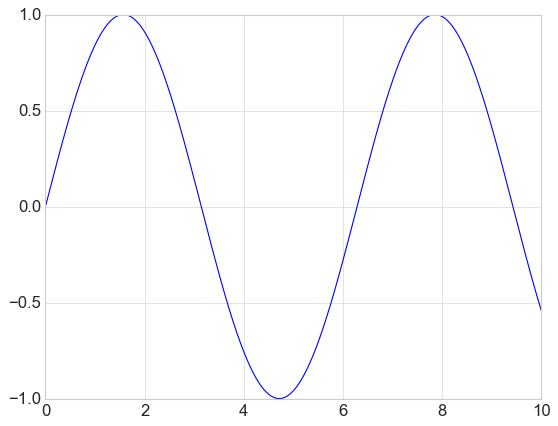

In [35]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0,10,1000)
ax.plot(x,np.sin(x))

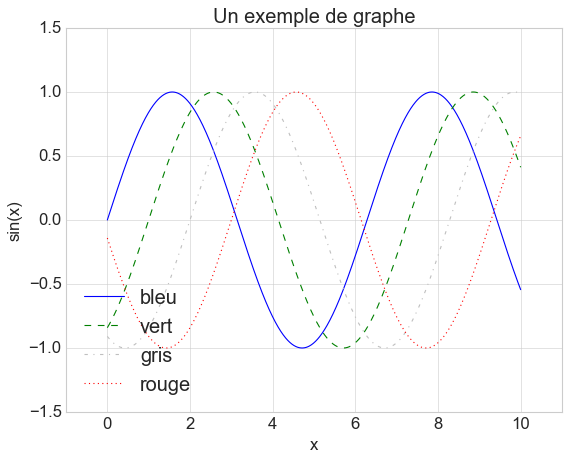

In [36]:
# Chanegr la taille de police par défaut
plt.rcParams.update({'font.size': 15})

fig = plt.figure()
ax = plt.axes()
# Couleur spécifiée par son nom, ligne solide
ax.plot(x, np.sin(x - 0), color='blue', linestyle='solid', label='bleu')
# Nom court pour la couleur, ligne avec des traits
ax.plot(x, np.sin(x - 1), color='g', linestyle='dashed', label='vert')
# Valeur de gris entre 0 et 1, des traits et des points
ax.plot(x, np.sin(x - 2), color='0.75', linestyle='dashdot', label='gris')
# Couleur spécifié en RGB, avec des points
ax.plot(x, np.sin(x - 3), color='#FF0000', linestyle='dotted', label='rouge')

# Les limites des axes, essayez aussi les arguments 'tight' et 'equal' 
# pour voir leur effet
ax.axis([-1, 11, -1.5, 1.5]);

# Les labels
plt.title("Un exemple de graphe")

# La légende est générée à partir de l'argument label de la fonctio
# plot. L'argument loc spécifie le placement de la légende
ax.legend(loc='lower left');

# Titres des axes
ax = ax.set(xlabel='x', ylabel='sin(x)')

## Visualiser l'incertitude 

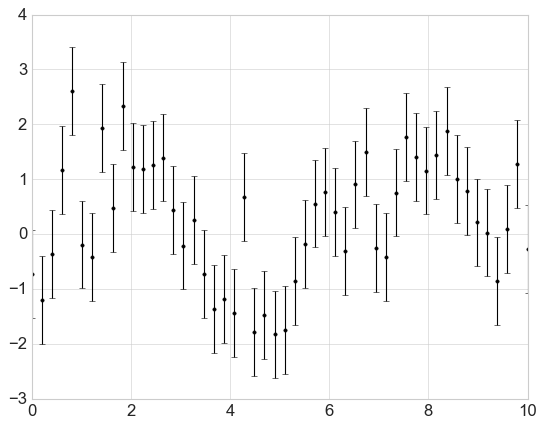

In [37]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

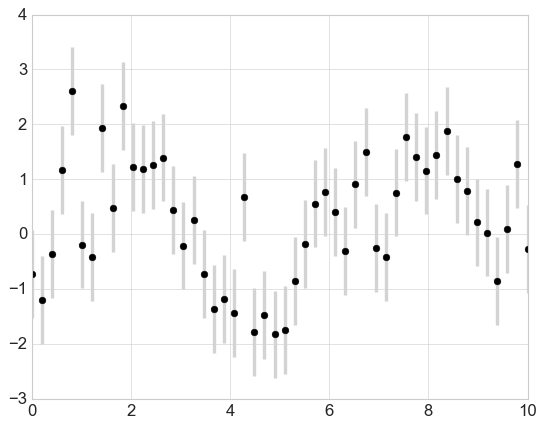

In [38]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic']


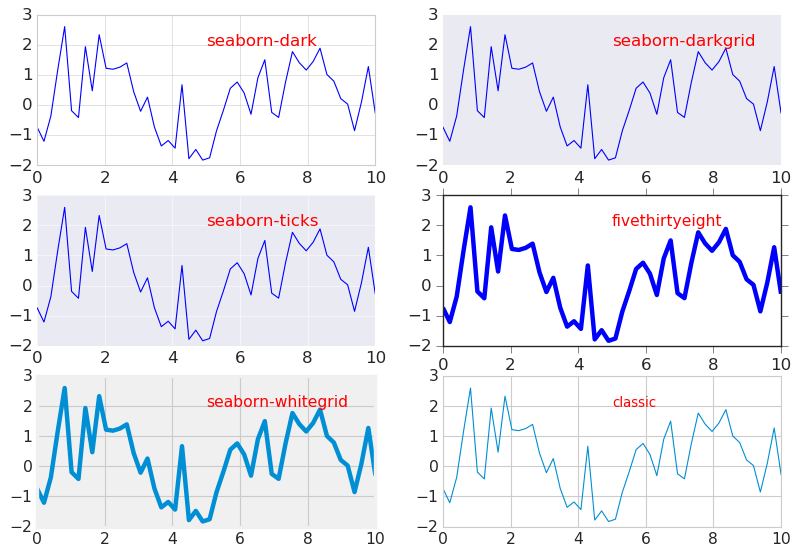

In [39]:
print(plt.style.available[:6])

# Notez la taille de la figure
fig = plt.figure(figsize=(12,8))
for i in range(6):
    # On peut ajouter des sous graphes ainsi
    fig.add_subplot(3,2,i+1) # nb de ligne , nb de colonne, num du graphe a modifier
    plt.style.use(plt.style.available[i])
    plt.plot(x, y)
    
    # Pour ajouter du texte
    plt.text(s=plt.style.available[i], x=5, y=2, color='red')

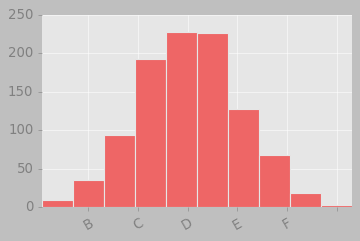

In [43]:
# On peut aussi tout personnaliser à la main

x = np.random.randn(1000)

plt.style.use('classic')
fig=plt.figure(figsize=(5,3))
ax = plt.axes(facecolor='#E6E6E6')

# Afficher les ticks en dessous de l'axe
ax.set_axisbelow(True)

# Cadre en blanc
plt.grid(color='w', linestyle='solid')

# Cacher le cadre
# ax.spines contient les lignes qui entourent la zone où les 
# données sont affichées.
for spine in ax.spines.values():
    spine.set_visible(False)
    
# Cacher les marqueurs en haut et à droite
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Nous pouvons personnaliser les étiquettes des marqueurs
# et leur appliquer une rotation
marqueurs = [-3, -2, -1, 0, 1, 2, 3]
xtick_labels = ['A', 'B', 'C', 'D', 'E', 'F']
plt.xticks(marqueurs, xtick_labels, rotation=30)

# Changer les couleur des marqueurs
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# Changer les couleur des barres
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

to go futher with matplotlib go to : [link](https://nbviewer.jupyter.org/urls/gist.githubusercontent.com/Jwink3101/e6b57eba3beca4b05ec146d9e38fc839/raw/f486ca3dcad44c33fc4e7ddedc1f83b82c02b492/Matplotlib_Cheatsheet)

# Seaborn

why?

- Matplotlib, surtout dans les versions avant la 2.0, ne génère pas des graphiques d'une grande qualité esthétique.
- Matplotlib ne possède pas de fonctions permettant de créer facilement des analyses statistiques sophistiquées.
- Les fonctions de Matplotlib ne sont pas faites pour interagir avec les Dataframes de Panda (que nous verrons au chapitre suivant).

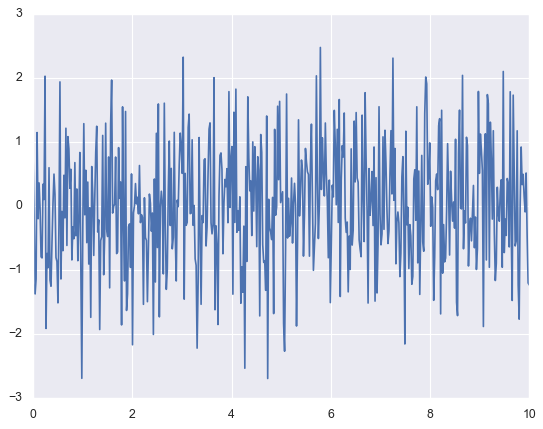

In [45]:
import seaborn as sns
sns.set()

x = np.linspace(0, 10, 500)
y = np.random.randn(500)
plt.plot(x,y)

la fonction *distplot*  permet non seulement de visualiser l'histogramme d'un échantillon, mais aussi d'estimer la distribution dont l'échantillon est issu.

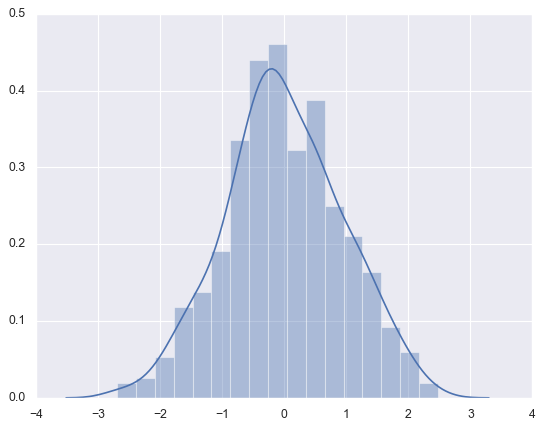

In [46]:
sns.distplot(y, kde=True);

## Seaborn with Iris data

compare les donne feature 2 a 2

In [47]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


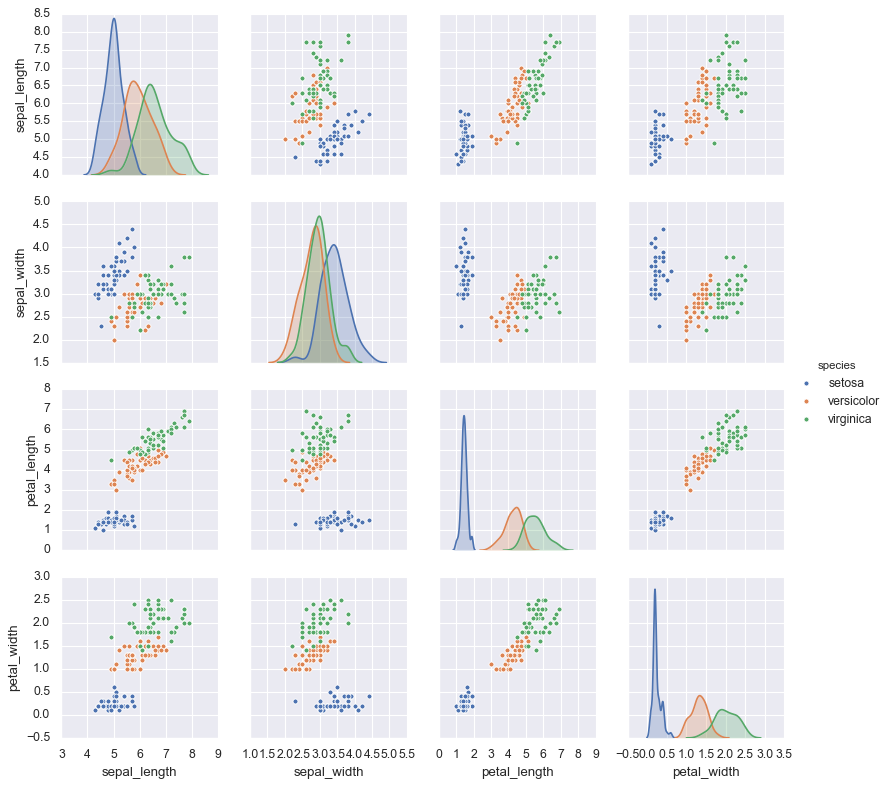

In [48]:
sns.pairplot(iris, hue='species', height=2.5);

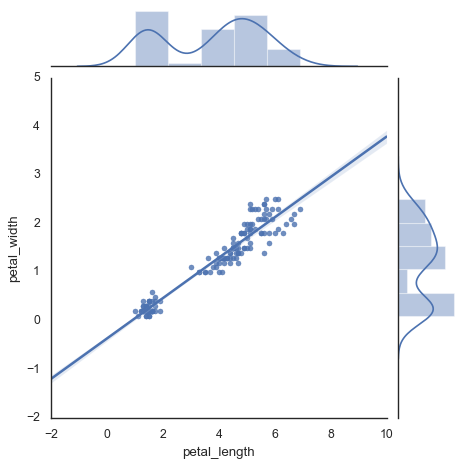

In [49]:
with sns.axes_style('white'):
    sns.jointplot("petal_length", "petal_width", data=iris, kind='reg')

# Panda

In [55]:
famille_panda = [
    [100, 5  , 20, 80],
    [50 , 2.5, 10, 40],
    [110, 6  , 22, 80],
]

famille_panda = np.array(famille_panda)

In [56]:
import pandas as pd

famille_panda_pd = pd.DataFrame(famille_panda)
famille_panda_pd

,0,1,2,3
0,100.0,5.0,20.0,80.0
1,50.0,2.5,10.0,40.0
2,110.0,6.0,22.0,80.0


In [58]:
famille_panda_df = pd.DataFrame(famille_panda,
                                index = ['maman', 'bebe', 'papa'],
                                columns = ['pattes', 'poil', 'queue', 'ventre'])
famille_panda_df

,pattes,poil,queue,ventre
maman,100.0,5.0,20.0,80.0
bebe,50.0,2.5,10.0,40.0
papa,110.0,6.0,22.0,80.0


In [59]:
famille_panda_df.ventre
famille_panda_df["ventre"] # les deux font la meme chose : acceder a une colonne

maman    80.0
bebe     40.0
papa     80.0
Name: ventre, dtype: float64

In [60]:
#obtenir les valeur au format numpy :
famille_panda_df.ventre.values

array([80., 40., 80.])

### parcours

In [70]:
for index,contenu in famille_panda_df.iterrows():
    print(index)
    print(type(contenu))

maman
<class 'pandas.core.series.Series'>
bebe
<class 'pandas.core.series.Series'>
papa
<class 'pandas.core.series.Series'>


In [71]:
famille_panda_df.iloc[2] # Avec iloc(), indexation positionnelle
famille_panda_df.loc["papa"] # Avec loc(), indexation par label

pattes    110.0
poil        6.0
queue      22.0
ventre     80.0
Name: papa, dtype: float64

In [73]:
famille_panda_df["ventre"] == 80  # panda dont le ventre est egal a 80

maman     True
bebe     False
papa      True
Name: ventre, dtype: bool

## masque 

In [80]:
masque = famille_panda_df["ventre"] == 80
pandas_80 = famille_panda_df[masque]

# On écrit plus souvent cela de cette manière :
# pandas_80 = famille_panda_df[famille_panda_df["ventre"] == 80]

pandas_80

,pattes,poil,queue,ventre
maman,100.0,5.0,20.0,80.0
papa,110.0,6.0,22.0,80.0


In [81]:
famille_panda_df[~masque] # inverse le masque c.a.d les panda deiferent de 80

,pattes,poil,queue,ventre
bebe,50.0,2.5,10.0,40.0


## Ajouter des lignes

In [82]:
quelques_pandas = pd.DataFrame([[105,4,19,80],[100,5,20,80]],      # deux nouveaux pandas
                               columns = famille_panda_df.columns) 
                               # même colonnes que famille_panda_df
tous_les_pandas = famille_panda_df.append(quelques_pandas)
tous_les_pandas

,pattes,poil,queue,ventre
maman,100.0,5.0,20.0,80.0
bebe,50.0,2.5,10.0,40.0
papa,110.0,6.0,22.0,80.0
0,105.0,4.0,19.0,80.0
1,100.0,5.0,20.0,80.0


In [83]:
tous_les_pandas.drop_duplicates() # eliminer les doublons

,pattes,poil,queue,ventre
maman,100.0,5.0,20.0,80.0
bebe,50.0,2.5,10.0,40.0
papa,110.0,6.0,22.0,80.0
0,105.0,4.0,19.0,80.0


In [84]:
tous_les_pandas

,pattes,poil,queue,ventre
maman,100.0,5.0,20.0,80.0
bebe,50.0,2.5,10.0,40.0
papa,110.0,6.0,22.0,80.0
0,105.0,4.0,19.0,80.0
1,100.0,5.0,20.0,80.0


In [85]:
# accéder aux noms des colonnes
famille_panda_df.columns

# créer une nouvelle colonne, composée de chaînes de caractères
famille_panda_df["sexe"] = ["f", "f", "m"] 
# la maman et le bébé sont des femelles, le papa est un mâle

# obtenir le nombre de lignes
len(famille_panda_df)

3

In [86]:
# obtenir les valeurs distinctes d'une colonne :
# pour la colonne ventre, il y a deux valeurs distinctes : 40 et 80
famille_panda_df.ventre.unique()

array([80., 40.])

In [87]:
data = pd.read_csv("data.csv", sep=";") # lire un fichier csv

FileNotFoundError: [Errno 2] File b'data.csv' does not exist: b'data.csv'

In [88]:
import os
os.getcwd() # get current dir

'/Users/arnold/Documents/Jupiter'

In [89]:
titanic = sns.load_dataset('titanic')

In [90]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [93]:
# decrire chache feature du dataframe (incluse permet d'inclure les variable non numerure)
titanic.describe(include="all") 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
titanic.fillna(value={"age": 0}).age.head(10) #remplacer les NaN par une valeur

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     0.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [95]:
titanic.fillna(method="pad").age.head(10) # remplacer par la valeur de l'element anterieur

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    35.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [96]:
#other delete les lignes qui on le NaN
titanic.dropna().head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False


In [97]:
titanic.dropna(axis="columns").head() # delete a column

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


In [98]:
titanic.rename(columns={"sex":"sexe"}) # renomme une colonne

,survived,pclass,sexe,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [99]:
f = lambda x: x+1
titanic.rename(index=f) # mofifier les index avec la fonction f

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
5,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
8,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
10,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [101]:
titanic.drop(0) # supprime la ligne dont l'index est egal a 0
titanic.drop(columns=["age"]) # supprime la colonne age
# argument inplace (SET A TRUE) permet de modififer le dataframe directement et ne pas retourner une copie

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


# Tableau crose dynamique

In [102]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [103]:
titanic.pivot_table('survived', index='sex', columns='class',aggfunc=sum)

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


In [104]:
titanic.dropna(inplace=True)
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.500000
       (18, 80]  0.968254  0.875000  0.666667
male   (0, 18]   0.800000  1.000000  1.000000
       (18, 80]  0.397436  0.333333  0.250000

# Algebre relationnel

In [107]:
import numpy as np
import pandas as pd

# On peut créer une Series à partir d'une list
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print("data ressemble à un tableau Numpy: ", data)
# On peut spécifier des indices à la main
data = pd.Series([0.25, 0.5, 0.75, 1.0],
         index=['a', 'b', 'c', 'd'])
print("data ressemble à un dict en Python: ", data)
print(data['b'])

# On peut même créer une Serie directement à partir d'une dict
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
area_dict = {'California': 423967, 
             'Texas': 695662,
             'New York': 141297, 
             'Florida': 170312,
             'Illinois': 149995}
population = pd.Series(population_dict)
area = pd.Series(area_dict)
print(population)
# Que pensez vous de cette ligne?
print(population['California':'Florida'])

data ressemble à un tableau Numpy:  0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64
data ressemble à un dict en Python:  a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.5
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64


In [109]:
# A partir d'une Series
df = pd.DataFrame(population, columns=['population'])
print(df)

# A partir d'une list de dict
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
df = pd.DataFrame(data)
print(df)

# A partir de plusieurs Series
df = pd.DataFrame({'population': population,
              'area': area})
print(df)

# A partir d'un tableau Numpy de dimension 2
df = pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])
print(df)

# Une fonction pour générer facilement des DataFrame. 
# Elle nous sera utile dans la suite de ce chapitre.
def make_df(cols, ind):
    """Crée rapidement des DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# exemple
make_df('ABC', range(3))

            population
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
   a  b
0  0  0
1  1  2
2  2  4
            population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995
        foo       bar
a  0.491699  0.553142
b  0.427216  0.027679
c  0.806221  0.481352


,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


## selection d'un element de Serie ou de dataframe

In [110]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])

print(data)

# On peut désigner un élément d'une Series par son index
print(data.loc['b'])

# Ou bien par sa position
print(data.iloc[1])

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.5
0.5


In [115]:
data = pd.DataFrame({'area':area, 'pop':population})
print(data)

data.loc[:'Florida', :'pop']

              area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135


,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860


# concatenation ou union

In [118]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [120]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
pd.concat([df1, df2]) # par defaut concatenation se fait verticalement solution argument axis

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


### probleme des index avec les unions 

In [121]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # Rend les index identiques
# Nous avons alors des index dupliqués
print(pd.concat([x, y]))

# Nous pouvons spécifier des index hiérarchiques
hdf = pd.concat([x, y], keys=['x', 'y'])
print(hdf)

    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


In [122]:
hdf.loc[('x', 1),]

A    A1
B    B1
Name: (x, 1), dtype: object

## Jointure de dataframe

In [125]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'department': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'date': [2004, 2008, 2012, 2014]})
df3 = pd.merge(df1, df2) # automatique parceque les 2 on une colonne en commun
df3 # df3 = pd.merge(df1, df2, left_on= "employee", right_on= "emp_name") au cas ou les nom son pas egaux

,employee,department,date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [127]:
df4 = pd.DataFrame({'department': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
df5=pd.merge(df3, df4)
df5

,employee,department,date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [130]:
#jointure plusieurs a plusieurs
df5 = pd.DataFrame({'department': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'competence': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})

In [131]:
pd.merge(df1,df5)

,employee,department,competence
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [134]:
# jointure externe
df6 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue', 'Lea'],
                    'department': ['Accounting', 'Engineering', 'Engineering', 'HR', 'Engineering']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'date': [2004, 2008, 2012, 2014]})
pd.merge(df6, df2) # lea a disparu

,employee,department,date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [136]:
pd.merge(df6, df2, how="left") # how="right" or how="outer"

,employee,department,date
0,Bob,Accounting,2008.0
1,Jake,Engineering,2012.0
2,Lisa,Engineering,2004.0
3,Sue,HR,2014.0
4,Lea,Engineering,NaN


In [137]:
pd.merge(df1.assign(key=0), df2.assign(key=0), on='key').drop('key', axis=1) # produit cartesien

,employee_x,department,employee_y,date
0,Bob,Accounting,Lisa,2004
1,Bob,Accounting,Bob,2008
2,Bob,Accounting,Jake,2012
3,Bob,Accounting,Sue,2014
4,Jake,Engineering,Lisa,2004
5,Jake,Engineering,Bob,2008
6,Jake,Engineering,Jake,2012
7,Jake,Engineering,Sue,2014
8,Lisa,Engineering,Lisa,2004
9,Lisa,Engineering,Bob,2008


In [139]:
rng = np.random.RandomState(42)

# Une Series avec cinq nombres aléatoires
ser = pd.Series(rng.rand(5))
print(ser.sum())
print(ser.mean())

2.811925491708157
0.5623850983416314


In [140]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
                   
# Par colonne
print(df.mean())

# Par ligne
print(df.mean(axis='columns'))

A    0.477888
B    0.443420
dtype: float64
0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64


In [141]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': [10,11,10,9,10,10]})                  
print(df)

  key  data1  data2
0   A      0     10
1   B      1     11
2   C      2     10
3   A      3      9
4   B      4     10
5   C      5     10


In [142]:
gb = df.groupby('key')

In [143]:
print(gb.sum())
print(gb.mean())

     data1  data2
key              
A        3     19
B        5     21
C        7     20
     data1  data2
key              
A      1.5    9.5
B      2.5   10.5
C      3.5   10.0


In [144]:
s = gb['data1','data2'].sum()
m = gb['data2',].mean()

groupped = pd.concat([s,m], axis=1)
groupped.columns = ["data1_somme","data2_somme","data2_moyenne"]

In [145]:
groupped

,data1_somme,data2_somme,data2_moyenne
key,,,
A,3,19,9.5
B,5,21,10.5
C,7,20,10.0
